In [1]:
!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data
dataset=pd.read_csv('Downloads/time_series_covid_19_confirmed.csv')

In [3]:
dataset.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [4]:
dataset.shape

(276, 498)

In [5]:
# delete the useless columns
df=dataset.drop(['Lat','Long'], axis=1, inplace=True)

In [6]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,0,0,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,0,0,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [7]:
# aggregate the rows by the country
corona_dataset_aggregated=dataset.groupby("Country/Region").sum()

In [8]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
Albania,0,0,0,0,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
Algeria,0,0,0,0,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
Andorra,0,0,0,0,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
Angola,0,0,0,0,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [9]:
corona_dataset_aggregated.shape

(193, 494)

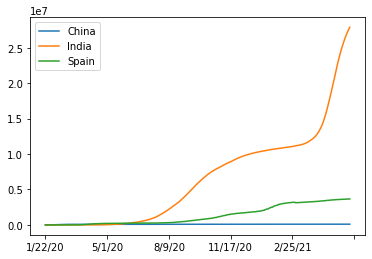

In [10]:
# visualize data related to a country
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['India'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

<AxesSubplot:>

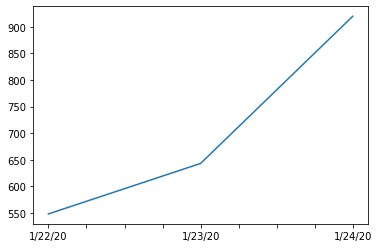

In [11]:
# calculate a good measure
corona_dataset_aggregated.loc['China'][:3].plot()

<AxesSubplot:>

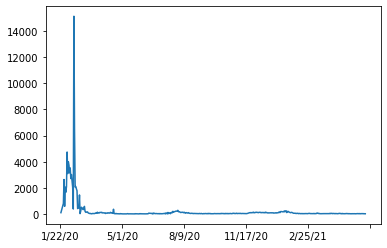

In [12]:
# calculate the first derivative of the curve
corona_dataset_aggregated.loc['China'].diff().plot()

In [13]:
# maximum infection rate
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [14]:
corona_dataset_aggregated.loc['India'].diff().max()

414188.0

In [15]:
corona_dataset_aggregated.loc['Spain'].diff().max()

93822.0

In [16]:
countries=list(corona_dataset_aggregated.index)
max_infection_rates=[]

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
    
corona_dataset_aggregated['Max Infection Rates']=max_infection_rates

In [17]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,Max Infection Rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,65080,65486,65728,66275,66903,67743,68366,69130,70111,1485.0
Albania,0,0,0,0,0,0,0,0,0,0,...,132153,132176,132209,132215,132229,132244,132264,132285,132297,1239.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,126434,126651,126860,127107,127361,127646,127926,128198,128456,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,13569,13569,13569,13569,13664,13671,13682,13693,13693,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,31909,32149,32441,32623,32933,33338,33607,33944,34180,405.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,4941,5119,5275,5404,5931,6086,6356,6396,6908,527.0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,304968,305201,305201,305777,306334,306795,306795,307569,307838,2884.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,6632,6649,6658,6662,6670,6688,6696,6723,6731,174.0


In [18]:
# create a new dataframe
corona_data=pd.DataFrame(corona_dataset_aggregated['Max Infection Rates'])

In [19]:
corona_data

,Max Infection Rates
Country/Region,
Afghanistan,1485.0
Albania,1239.0
Algeria,1133.0
Andorra,299.0
Angola,405.0
...,...
Vietnam,527.0
West Bank and Gaza,2884.0
Yemen,174.0


In [20]:
# importing happiness dataset
happiness_report=pd.read_csv("Downloads/worldwide_happiness_report.csv")

In [21]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [22]:
# drop the useless column
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [23]:
happiness_report.drop(useless_cols, axis=1, inplace=True)

In [24]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [25]:
happiness_report.set_index("Country or region", inplace =True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [26]:
# join the dataset
corona_data.shape

(193, 1)

In [27]:
happiness_report.shape

(156, 4)

In [28]:
data=corona_data.join(happiness_report,how="inner")
data

,Max Infection Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,1485.0,0.350,0.517,0.361,0.000
Albania,1239.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,41080.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,2303.0,0.960,1.427,0.805,0.154
Vietnam,527.0,0.741,1.346,0.851,0.543
Yemen,174.0,0.287,1.163,0.463,0.143
Zambia,1796.0,0.578,1.058,0.426,0.431


In [29]:
data.corr()

,Max Infection Rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max Infection Rates,1.000000,0.112499,0.051755,0.081354,-0.052661
GDP per capita,0.112499,1.000000,0.757521,0.859431,0.394799
Social support,0.051755,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.081354,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,-0.052661,0.394799,0.456317,0.423146,1.000000


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rates'>

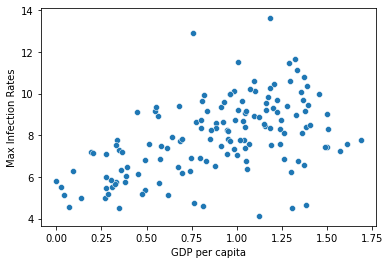

In [33]:
#visualisation
x=data['GDP per capita']
y=data['Max Infection Rates']
sns.scatterplot(x=x,y=np.log(y))


<AxesSubplot:xlabel='GDP per capita', ylabel='Max Infection Rates'>

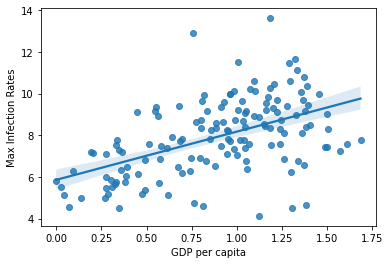

In [35]:
sns.regplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Social support', ylabel='Max Infection Rates'>

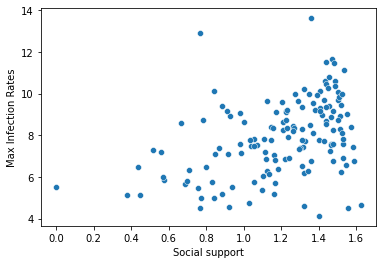

In [36]:
x=data['Social support']
y=data['Max Infection Rates']
sns.scatterplot(x=x,y=np.log(y))


<AxesSubplot:xlabel='Social support', ylabel='Max Infection Rates'>

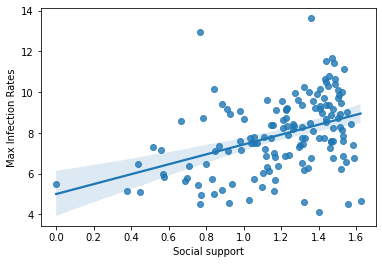

In [37]:
sns.regplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max Infection Rates'>

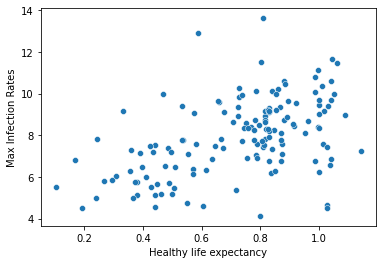

In [38]:
x=data['Healthy life expectancy']
y=data['Max Infection Rates']
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max Infection Rates'>

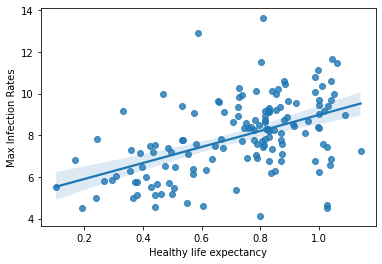

In [39]:
sns.regplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max Infection Rates'>

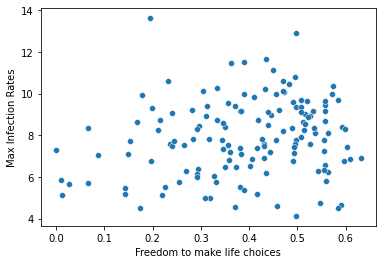

In [40]:
x=data['Freedom to make life choices']
y=data['Max Infection Rates']
sns.scatterplot(x=x,y=np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max Infection Rates'>

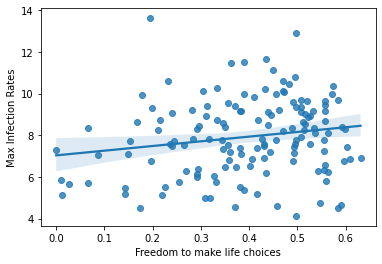

In [41]:
sns.regplot(x=x,y=np.log(y))